<a href="https://colab.research.google.com/github/shashank8794/MNIST_overlay/blob/master/MNIST_overlay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
from keras.datasets import mnist
from matplotlib import pyplot
import cv2
# load dataset
(trainx, trainy), (testx, testy) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [3]:
trainX = trainx[:2000]
trainY = trainy[:2000]
testX = testx[:500]
testY = testy[:500]

In [4]:
trainX.shape

(2000, 28, 28)

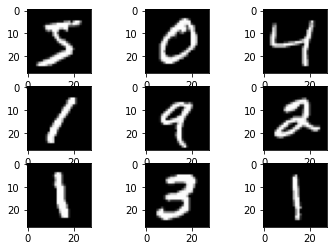

In [5]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [6]:
train_resized = np.asarray([cv2.resize(image, (32, 32)) for image in trainX])
test_resized = np.asarray([cv2.resize(image, (32, 32)) for image in testX])

In [7]:
train_resized.shape

(2000, 32, 32)

In [8]:
trainX_resized = train_resized.reshape((train_resized.shape[0], 32, 32, 1)).astype(np.float32)
testX_resized = test_resized.reshape((test_resized.shape[0], 32, 32, 1)).astype(np.float32)

In [9]:
trainX_resized.shape

(2000, 32, 32, 1)

In [10]:
trainX_rgb = np.concatenate([trainX_resized, trainX_resized, trainX_resized], axis=3)
testX_rgb = np.concatenate([testX_resized, testX_resized, testX_resized], axis=3)

In [11]:
testX_rgb.shape

(500, 32, 32, 3)

In [12]:
trainX_rgb = trainX_rgb / 255
testX_rgb = testX_rgb / 255

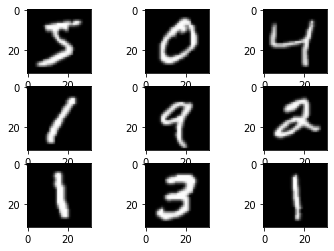

In [13]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX_rgb[i], cmap=pyplot.get_cmap('Greys'))
# show the figure
pyplot.show()

In [14]:
# Inversion
train_i = []
for img in trainX_rgb:
  a = tf.constant(img)
  b = 1 - a
  train_i.append(b)

In [15]:
test_i = []
for img in testX_rgb:
  a = tf.constant(img)
  b = 1 - a
  test_i.append(b)

In [ ]:
#train_inv = np.array(train_i)

In [17]:
def longlist2array(longlist):
    wide = [[row[c] for row in longlist] for c in range(len(longlist[0]))]
    a = np.array(wide)
    a = a.transpose([1,0,2,3])
    return a
test_inv = longlist2array(test_i)
train_inv = longlist2array(train_i)

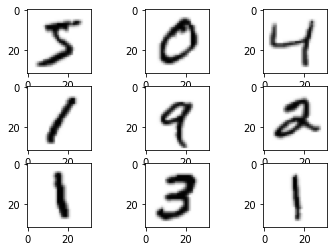

In [18]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train_inv[i], cmap=pyplot.get_cmap('Greys'))
# show the figure
pyplot.show()

In [19]:
train_inv.shape

(2000, 32, 32, 3)

In [20]:
# CIFAR 10 dataset

#IMPORTS
import os,urllib.request

# PROVIDE YOUR DOWNLOAD DIRECTORY HERE
datapath = '/content/sample_data/shashank/'  

# CREATING DOWNLOAD DIRECTORY
if not os.path.exists(datapath):
    os.makedirs(datapath)

In [21]:
url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'

filename = url.split('/')[-1]

if os.path.exists(datapath+filename):
    print(filename, ' already exists')
else:
    print('Downloading ',filename)
    urllib.request.urlretrieve (url, datapath+filename)
print('File is downloaded')

# Extracting CIFAR10 data

import tarfile
datapath = '/content/sample_data/shashank/'  

files = os.listdir(datapath)
for file in files:
    if file.endswith('gz'):
        print('Extracting ',file)
        tarfile.open(datapath+file, 'r:gz').extractall(datapath)
print('Extraction Complete')

# REMOVE THE ARCHIVES
print('Removing ',file)
os.remove(datapath+file)
print ('All archives removed')

File is downloaded
Extracting  cifar-10-python.tar.gz
Extraction Complete
Removing  cifar-10-python.tar.gz
All archives removed


In [22]:
import pickle
import numpy as np
from keras.utils import np_utils
from matplotlib import pyplot as plt

path = '/content/sample_data/shashank/cifar-10-batches-py/' 
num_classes = 10 
image_batch = 10000 
num_files_train = 5  

# Total number of training images
images_train = image_batch * num_files_train

def unpickle(file):  
    
    # Convert byte stream to object
    with open(path + file,'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')  
    # returns dictionary with images and labels
    return dict

def load_data(file):
    data = unpickle(file)
    # Get raw images
    images_array = data[b'data']
    raw = np.array(images_array, dtype = float) / 255.0
    images = raw.reshape([-1, 3, 32, 32])
    images = images.transpose([0, 2, 3, 1])
    labels = np.array(data[b'labels'])
    return images, labels

In [23]:
def get_test_data():
    images, labels = load_data(file = "test_batch")
    class_name = np_utils.to_categorical(labels,num_classes)
    return images, labels, class_name

def get_train_data():
    images = np.zeros(shape = [images_train, 32, 32, 3], dtype = float)
    labels = np.zeros(shape= [images_train],dtype = int)
    start = 0
    # For all 5 files
    for i in range(num_files_train):
        images_batch, labels_batch = load_data(file = "data_batch_" + str(i+1))
        end = start + image_batch
        images[start:end,:] = images_batch        
        labels[start:end] = labels_batch
        start = end
    return images, labels, np_utils.to_categorical(labels,num_classes)

In [24]:
raw = unpickle("batches.meta")[b'label_names']
class_names = [x.decode('utf-8') for x in raw]

In [25]:
images_train, labels_train, class_train = get_train_data()
images_test, labels_test, class_test = get_test_data()

In [26]:
image_train = images_train[:2000]
image_test = images_test[:500]

In [27]:
image_test.shape

(500, 32, 32, 3)

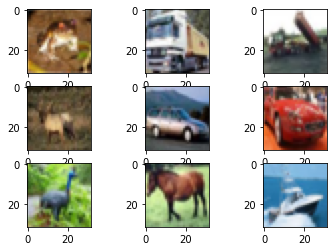

In [28]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(image_train[i], cmap=pyplot.get_cmap('Greys'))
# show the figure
pyplot.show()

In [29]:
X = []
Y = []
for i in range(0, train_inv.shape[0]):
  c = np.multiply(train_inv[i], image_train[i]).tolist()
  X.append(c)

for i in range(0, test_inv.shape[0]):
  d = np.multiply(test_inv[i], image_test[i]).tolist()
  Y.append(d)

In [30]:
X_train = np.array(X)
X_test = np.array(Y)

In [31]:
X_train.shape

(2000, 32, 32, 3)

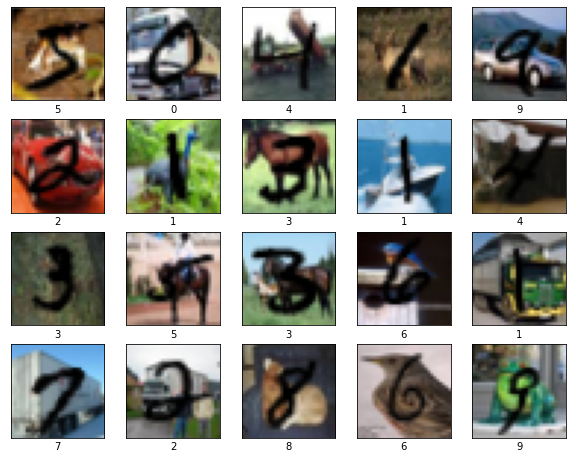

In [32]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(trainY[i])
plt.show()

In [123]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [125]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [128]:
model.fit(X_train, trainY, epochs=300)

Epoch 1/300
63/63 [==============================] - 0s 3ms/step - loss: 0.0869 - accuracy: 0.9855
Epoch 2/300
63/63 [==============================] - 0s 3ms/step - loss: 0.0791 - accuracy: 0.9860
Epoch 3/300
63/63 [==============================] - 0s 3ms/step - loss: 0.0812 - accuracy: 0.9820
Epoch 4/300
63/63 [==============================] - 0s 3ms/step - loss: 0.0811 - accuracy: 0.9850
Epoch 5/300
63/63 [==============================] - 0s 3ms/step - loss: 0.0789 - accuracy: 0.9905
Epoch 6/300
63/63 [==============================] - 0s 3ms/step - loss: 0.0822 - accuracy: 0.9920
Epoch 7/300
63/63 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9950
Epoch 8/300
63/63 [==============================] - 0s 3ms/step - loss: 0.0952 - accuracy: 0.9875
Epoch 9/300
63/63 [==============================] - 0s 3ms/step - loss: 0.1350 - accuracy: 0.9735
Epoch 10/300
63/63 [==============================] - 0s 3ms/step - loss: 0.1180 - accuracy: 0.9775
Epoch 11/

In [129]:
test_loss, test_accuracy = model.evaluate(X_test, testY)
print('test_accuracy: ', test_accuracy)

16/16 [==============================] - 0s 2ms/step - loss: 7.9557 - accuracy: 0.7140
test_accuracy:  0.7139999866485596


In [130]:
predict = model.predict(X_test)

In [132]:
np.argmax(predict[5])

1

In [133]:
testY[5]

1

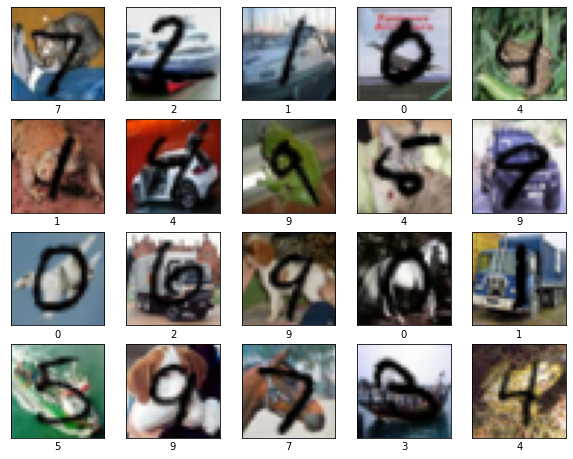

In [138]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(np.argmax(predict[i]))
plt.show()